# Opdracht week 1 en 2 canvas Petro Boom

Eerst de eerste 2 documenten inladen

In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('survey.csv')
df1.head()


,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [2]:
df2 = pd.read_csv(('steps.csv'), delimiter = ";")
df2.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vervolgens samen voegen. 

In [3]:
df = pd.merge(df1, df2, on = 'id') #'app' is the common identifier
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


iloc gebruikt om de kolommen te selecteren waar de stappen per id in staan. Dit gebruikt om het gemiddelde en de mediaan per id te berekenen en dit vervolgens toe te voegen als kolom bij de df.

Vervolgens de outliners eruit halen dmv def abnormalsteps en df["gem_stappen"] = df["gem_stappen"].apply(abnormalsteps)

In [4]:
df["gem_stappen"] = df.iloc[:, 9:].mean(axis = 1)
df["mediaan_stappen"] = df.iloc[:,9:].median(axis=1)
df["gem_stappen"] = df["gem_stappen"].apply(pd.to_numeric, errors='coerce')

gem_stappenlijn = df["gem_stappen"].mean()
mediaan_stappenlijn = df["mediaan_stappen"].median()
def abnormalsteps(x):
    if(x < 1000.0) or (x > 12000.0): 
        return float('NaN')
    else: 
        return x
df["gem_stappen"] = df["gem_stappen"].apply(abnormalsteps)
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,gem_stappen,mediaan_stappen
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212,9870.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313,5375.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730,8255.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000,3290.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630,5058.0


Histogram voor weergaven van het gemiddeld aantal stappen per hoeveelheid personen. zo is te zien dat de meeste personen tussen de 5000 en 6000 stappen zet gemiddeld. 
Daarnaast het gemiddelde en de mediaan toegevoegd.

C:\Users\Petro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


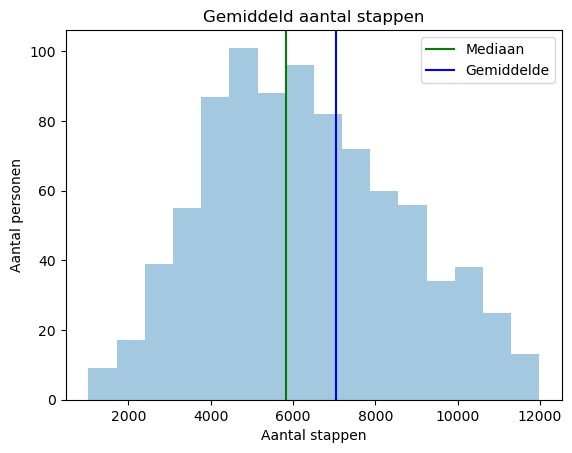

In [5]:
sns.distplot(df["gem_stappen"], kde=False) 
plt.title("Gemiddeld aantal stappen")
plt.xlabel("Aantal stappen")
plt.ylabel("Aantal personen")
plt.axvline(mediaan_stappenlijn, 0, 100, color='green', label="Mediaan") #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(gem_stappenlijn, 0, 100, color='blue', label="Gemiddelde") 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

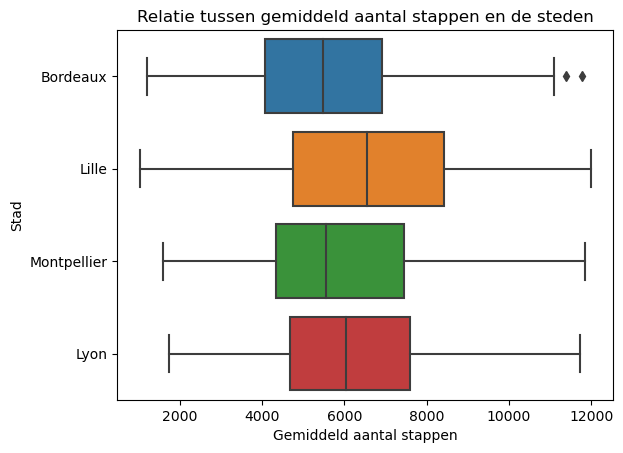

In [6]:
sns.boxplot(data=df, y='city' ,x='gem_stappen') 
plt.title("Relatie tussen gemiddeld aantal stappen en de steden")
plt.ylabel('Stad')
plt.xlabel('Gemiddeld aantal stappen')
plt.show()

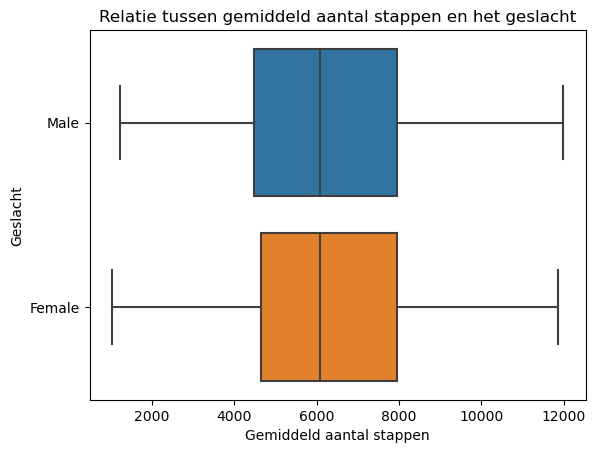

In [7]:
sns.boxplot(data=df, y='gender' ,x='gem_stappen') 
plt.title("Relatie tussen gemiddeld aantal stappen en het geslacht")
plt.ylabel('Geslacht')
plt.xlabel('Gemiddeld aantal stappen')
plt.show()

# WEEK 2 OEFENING

Gender, city en age omgezet naar numerieke waarden. Zo kan ik hiermee ook kijken of er een verband is tussen deze categorieën en het aantal stappen.
Voor de verschillende categorieën heb ik eerst value_counts() gedaan om te kijken welke categorieën er zijn. (binnen city dus Lille, Montpellier, Lyon en Bordeaux)

In [8]:
df["gender_1"]= df["gender"]
df["gender_1"].replace(["Male", "Female"],
                        [1, 0], inplace=True)

df["city_1"]= df["city"]
df["city_1"].replace(["Lille", "Montpellier", "Lyon", "Bordeaux"],
                        [0, 1, 2, 3], inplace=True)
df["age_1"]= df["age"]
df["age_1"].replace(["25-34", "35-44", "45-54", "<25", "55-64", "65+"],
                        [1, 2, 3, 0,4,5], inplace=True)

In [9]:
df.head() # Voor een weergaven van de toegevoegde kolommen

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,gem_stappen,mediaan_stappen,gender_1,city_1,age_1
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,10205.521212,9870.0,1,3,1
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,5687.423313,5375.0,1,0,2
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730,8255.0,1,1,1
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3633.200000,3290.0,1,2,0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,5312.129630,5058.0,0,1,1


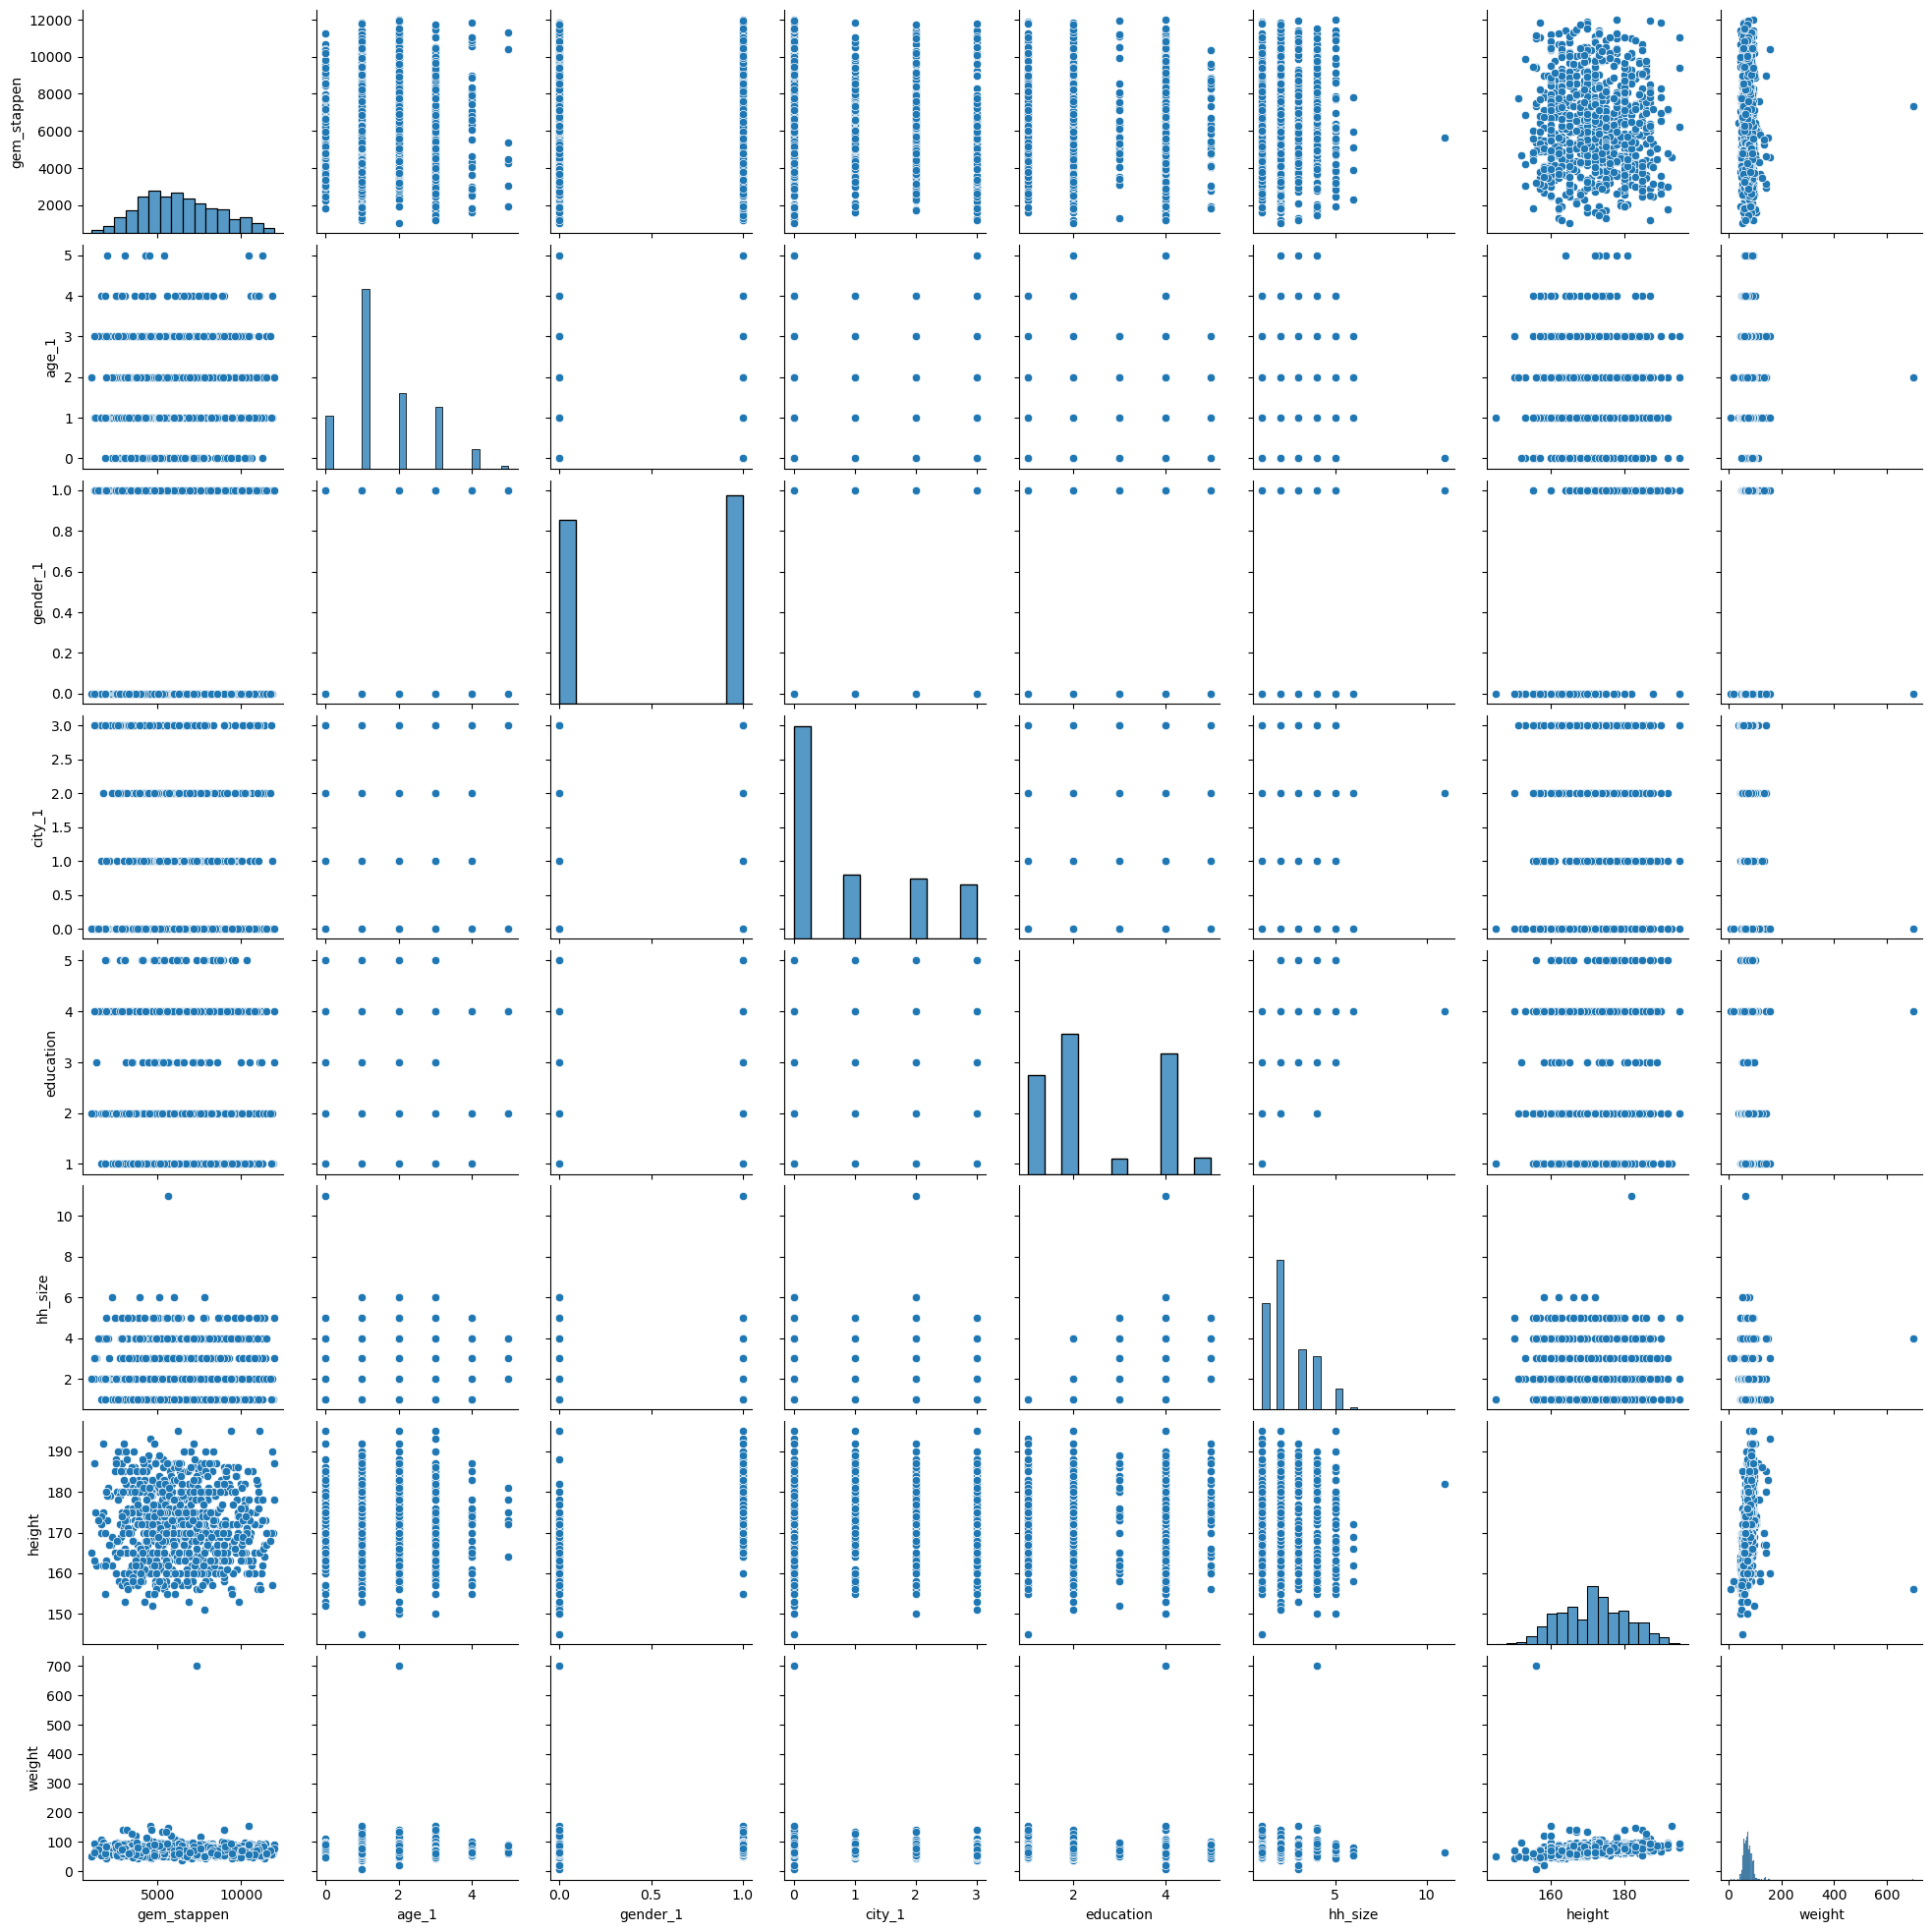

In [10]:
df_subset = df[["gem_stappen","age_1", "gender_1", "city_1", "education", "hh_size", "height", "weight"]] ## Alle variabelen genomen om zo sneller te zien of er correlatie zit tussen gem_stappen en een andere variabel.
sns.pairplot(df_subset)

In [11]:
df_subset.corr()

,gem_stappen,age_1,gender_1,city_1,education,hh_size,height,weight
gem_stappen,1.000000,0.068445,-0.009779,-0.128971,0.021450,0.031192,-0.015350,-0.029742
age_1,0.068445,1.000000,-0.046456,0.009613,0.104617,0.156957,-0.091941,0.031620
gender_1,-0.009779,-0.046456,1.000000,0.050065,-0.012117,-0.026577,0.713257,0.227547
city_1,-0.128971,0.009613,0.050065,1.000000,-0.001730,0.046511,0.052628,0.014514
education,0.021450,0.104617,-0.012117,-0.001730,1.000000,0.825585,-0.046343,0.029968
hh_size,0.031192,0.156957,-0.026577,0.046511,0.825585,1.000000,-0.059704,0.036468
height,-0.015350,-0.091941,0.713257,0.052628,-0.046343,-0.059704,1.000000,0.265138
weight,-0.029742,0.031620,0.227547,0.014514,0.029968,0.036468,0.265138,1.000000


Describe and interpret the results

## Predictive model

Explain linear regression in your own words

Wanneer er een verband zit tussen 2 gegeven, kan er een voorspelling gedaan worden voor de volgende waarden. Des te groter het verband, des te betrouwbaarder de volgende waarden.

Omdat er in de eerder gegeven regressie tabel eruit kwam dat er weinig regressie is tussen de waarden, heb ik maar een y waarden genomen die me interessant leek om te bekijken. Ondanks dat het helemaal niks zegt (omdat de regressie -0.015339 is)

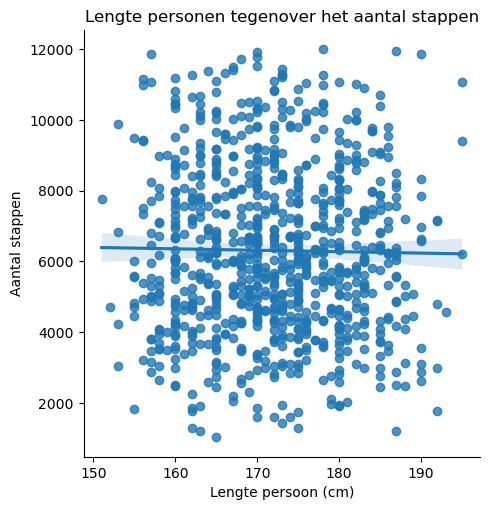

In [12]:
sns.lmplot(x="height", y="gem_stappen", data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Lengte persoon (cm)')
plt.ylabel('Aantal stappen')
plt.title('Lengte personen tegenover het aantal stappen')
plt.show()

Ik kreeg elke keer bij de lm.fit(x,y) de foutmelding: Input y contains NaN. Hierdoor heb ik besloten alle NaN weg te halen uit de eventuele te gebruiken kolommen, dit heb ik gedaan met onderstaande;

In [14]:
 df=df.dropna(subset=["age_1", "gender_1", "city_1", "education", "hh_size", "height", "weight", "gem_stappen"])

Zoals hierboven vermeld kreeg ik eerst elke keer dat de X en ook de Y NaN bevatte. Hierdoor heb ik de NaNs weggehaald. Eerst had ik x elke keer een bepaalde waarde. Hier kwam elke keer bij de r2 score een hele lage (en dus niet goede) score uit en bij een de sqrt een hele hoge waarde wat juist laag moet zijn. 
Vervolgens kwam Erik met zijn regels dat de computer elke combinatie langs gaat. (zie helemaal onderaan). Eigenlijk omdat daaruit ook weinig verband komt, heb ik de benodigde grafieken erin gezet maar verder weinig mee gedaan omdat ik of iets verkeerd gedaan heb waardoor er geen verbanden zijn, of zit het in de opdracht.


In [15]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df[["age_1", "gender_1", "city_1", "education", "hh_size", "height", "weight"]] 
y = df["gem_stappen"]
lm = LinearRegression() #this creates a new LR model
lm = lm.fit(x, y) #this "fits" the model

In [16]:
df["gem_stappen_predict"] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(10)

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,10-5-2014,11-5-2014,12-5-2014,13-5-2014,gem_stappen,mediaan_stappen,gender_1,city_1,age_1,gem_stappen_predict
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,10205.521212,9870.0,1,3,1,5677.910585
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,5687.423313,5375.0,1,0,2,6485.318478
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4567.0,2567.0,1129.0,NaN,8301.729730,8255.0,1,1,1,6188.542921
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,3633.200000,3290.0,1,2,0,5726.431068
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,5312.129630,5058.0,0,1,1,6218.946191
5,6,Lille,Male,35-44,1,1,Vocational,170.0,63.0,NaN,...,NaN,NaN,NaN,NaN,11908.509804,11667.5,1,0,2,6613.731939
6,7,Montpellier,Male,25-34,2,2,Master or doctorate,175.0,75.0,NaN,...,NaN,NaN,NaN,NaN,4715.400000,4025.0,1,1,1,6207.987662
7,8,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0,NaN,...,NaN,NaN,NaN,NaN,3594.051724,3063.0,0,3,1,5578.706339
8,9,Lille,Female,35-44,4,4,Vocational,172.0,69.0,NaN,...,2556.0,302.0,2442.0,NaN,8626.707965,8353.0,0,0,2,6716.483180
9,10,Lille,Female,25-34,2,2,Master or doctorate,165.0,93.0,NaN,...,NaN,NaN,NaN,NaN,3787.043478,3564.5,0,0,1,6404.580484


In [17]:
from sklearn.metrics import r2_score #we need this function from sklearn
r2_score(df["gem_stappen"], df['gem_stappen_predict'])

0.02334190756371113

In [18]:
from sklearn.metrics import mean_squared_error #we need this function from sklearn
from math import sqrt #we need the square root from the math library

sqrt(mean_squared_error(df["gem_stappen"], df["gem_stappen_predict"]))

2326.1519541450393

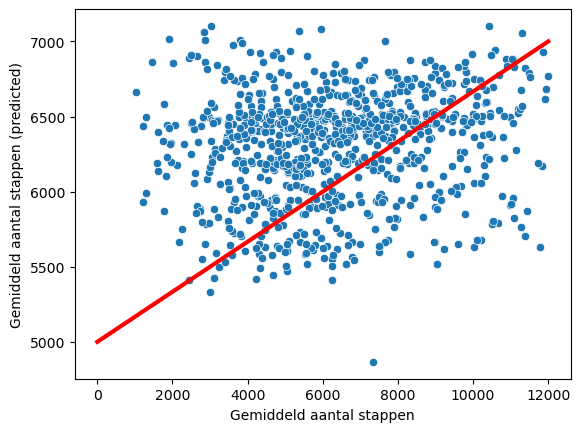

In [19]:
sns.scatterplot(x="gem_stappen",y="gem_stappen_predict",data=df)
plt.plot([0, 12000], [5000, 7000], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Gemiddeld aantal stappen')
plt.ylabel('Gemiddeld aantal stappen (predicted)')
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn
from sklearn.metrics import r2_score #we need this function from sklearn
import itertools
#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
stuff = ["age_1", "gender_1", "city_1", "education", "hh_size", "height", "weight"]
for L in range(len(stuff) + 1):
  for subset in itertools.combinations(stuff, L):
    combi = list(subset)
    
    if len(combi) != 0:
      x = df[combi] 
      y = df["gem_stappen"]
      lm = LinearRegression() #this creates a new LR model
      lm = lm.fit(x, y) #this "fits" the model
      df["gem_stappen_1"] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
      r2 = r2_score(df['gem_stappen'], df['gem_stappen_1'])
      print(combi, r2)

['age_1'] 0.004642187876210624
['gender_1'] 9.979537031579166e-05
['city_1'] 0.016692234369477976
['education'] 0.00047210645460549205
['hh_size'] 0.0009852707254242032
['height'] 0.0002352947232950875
['weight'] 0.000857409693575728
['age_1', 'gender_1'] 0.004700939827573247
['age_1', 'city_1'] 0.021440660209404938
['age_1', 'education'] 0.004870301303309232
['age_1', 'hh_size'] 0.005099537043703695
['age_1', 'height'] 0.0047323255656227525
['age_1', 'weight'] 0.005630745924727676
['gender_1', 'city_1'] 0.016702292745636838
['gender_1', 'education'] 0.000571300629206517
['gender_1', 'hh_size'] 0.001078106354555186
['gender_1', 'height'] 0.00023672924524853478
['gender_1', 'weight'] 0.0008697688140720805
['city_1', 'education'] 0.017085179872156298
['city_1', 'hh_size'] 0.018019682173640916
['city_1', 'height'] 0.016768155078429436
['city_1', 'weight'] 0.01745690174534098
['education', 'hh_size'] 0.0010349290052510396
['education', 'height'] 0.0006865323694524861
['education', 'weight'

# Conclusie

Met mijn resultaten kan geconcludeerd worden dat er geen enkel verband zit binnen deze gecombineerde dataset. De r2 score zijn bij elke te laag, en daardoor de sqrt score te hoog. Hierdoor kan ik op basis van deze resultaten geen voorspelling doen voor de volgende waarden. Wellicht was het mogelijk wanneer ik meer waarden erbuiten laat vanaf het begin, maar dat moet ook niet helemaal de bedoeling zijn denk ik.
Het is wel erg leerzaam en handig om analyse en een voorspellingen te doen bij elke dataset. Zo zie ik weer dat (los van of ik het helemaal goed gedaan heb) geen verband ook een uitkomst kan zijn.